In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
#simple class to get stock data from AlphaVantage API
class AlphaVantageConnector:
    def __init__(self, APIKey, dataType="json"):
        self.APIKey = APIKey
        self.dataType = dataType
        self.data = None

    def getDaily(self, ticker,  outputSize="full"):
        self.frequency = "daily"

        if self.dataType != "json":
            self.dataType = "csv"

        if outputSize != "full":
            outputSize = "compact"

        response = requests.get(
f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&datatype={self.dataType}&outputsize={outputSize}&apikey={self.APIKey}")

        if response.ok:
            self.data = response.content
            return self.data
        else:
            raise Exception(f"{response.status_code}: {response.reason}")

    def toDictionary(self):
        if self.data is None:
            raise Exception("Cannot create dictionary. No data was retrieved from the API.")

        if self.dataType == "json":
            if self.frequency == "daily":
                dictionary = json.loads(self.data)
                return dictionary['Time Series (Daily)']

    def toDataFrame(self):
      if self.data is None:
                  raise Exception("Cannot create data frame. No data was retrieved from the API.")
      if self.dataType == "json":
          df = pd.DataFrame.from_dict(self.toDictionary()).transpose().rename(
columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume':
'Volume'})
          df.index.name = "Date"
          return df

In [3]:
#how to use the AlphaVantageAPI class to collect stock data
av = AlphaVantageConnector("I1ZPGZT3TBFALW8H")
av.getDaily("META") #META is the stock ticker for the company Meta
data = av.toDataFrame() #convert the AlphaVantage data to a pandas data frame
data.head() #use the data frame in different ways as outlined in this chapter

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-05,318.9800,321.8800,315.3900,318.2900,16952128
2023-12-04,317.2900,320.8600,313.6600,320.0200,19037080
2023-12-01,325.4800,326.8600,320.7600,324.8200,15276375
2023-11-30,331.8900,333.5000,322.4037,327.1500,23146387
2023-11-29,339.6900,339.9000,330.7800,332.2000,16024497


In [4]:
len(data)

2906

In [ ]:
# Make index a column
data.reset_index(inplace=True)
data.sort_values(by='Date', inplace=True)
data.head()

In [7]:
data.head()

,Date,Open,High,Low,Close,Volume
2905,2012-05-18,42.0500,45.0000,38.0000,38.2318,573576400
2904,2012-05-21,36.5300,36.6600,33.0000,34.0300,168192700
2903,2012-05-22,32.6100,33.5900,30.9400,31.0000,101786600
2902,2012-05-23,31.3700,32.5000,31.3600,32.0000,73600000
2901,2012-05-24,32.9500,33.2100,31.7700,33.0300,50237200


In [5]:
# For a given Company
# Fetch SEC data
# Fetch Stock Data
# Build sequence model e.g. RNN, LSTM, Transformer e.t.c on stock data (Stock prediction)
# Build Non-sequence Model for SEC data (Revenue prediction)
# Explore combination of SEC Data and Stock Data. Non-temporal and temporal combinations
    #1. Summarise stock data to fit sec data(Quarterly). Average stock data or take stock at end of quarters
# Build model on combined data for Stock prediction

# Models
# Price performance
# Model performance

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 2905 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2906 non-null   object
 1   Open    2906 non-null   object
 2   High    2906 non-null   object
 3   Low     2906 non-null   object
 4   Close   2906 non-null   object
 5   Volume  2906 non-null   object
dtypes: object(6)
memory usage: 158.9+ KB


In [12]:
# Convert columns into appropriate types
data['Close'] = pd.to_numeric(data['Close'])
data['Open'] = pd.to_numeric(data['Open'])
data['High'] = pd.to_numeric(data['High'])
data['Low'] = pd.to_numeric(data['Low'])
data['Volume'] = pd.to_numeric(data['Volume'])
data["Date"] = pd.to_datetime(data["Date"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 2905 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2906 non-null   datetime64[ns]
 1   Open    2906 non-null   float64       
 2   High    2906 non-null   float64       
 3   Low     2906 non-null   float64       
 4   Close   2906 non-null   float64       
 5   Volume  2906 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 158.9 KB


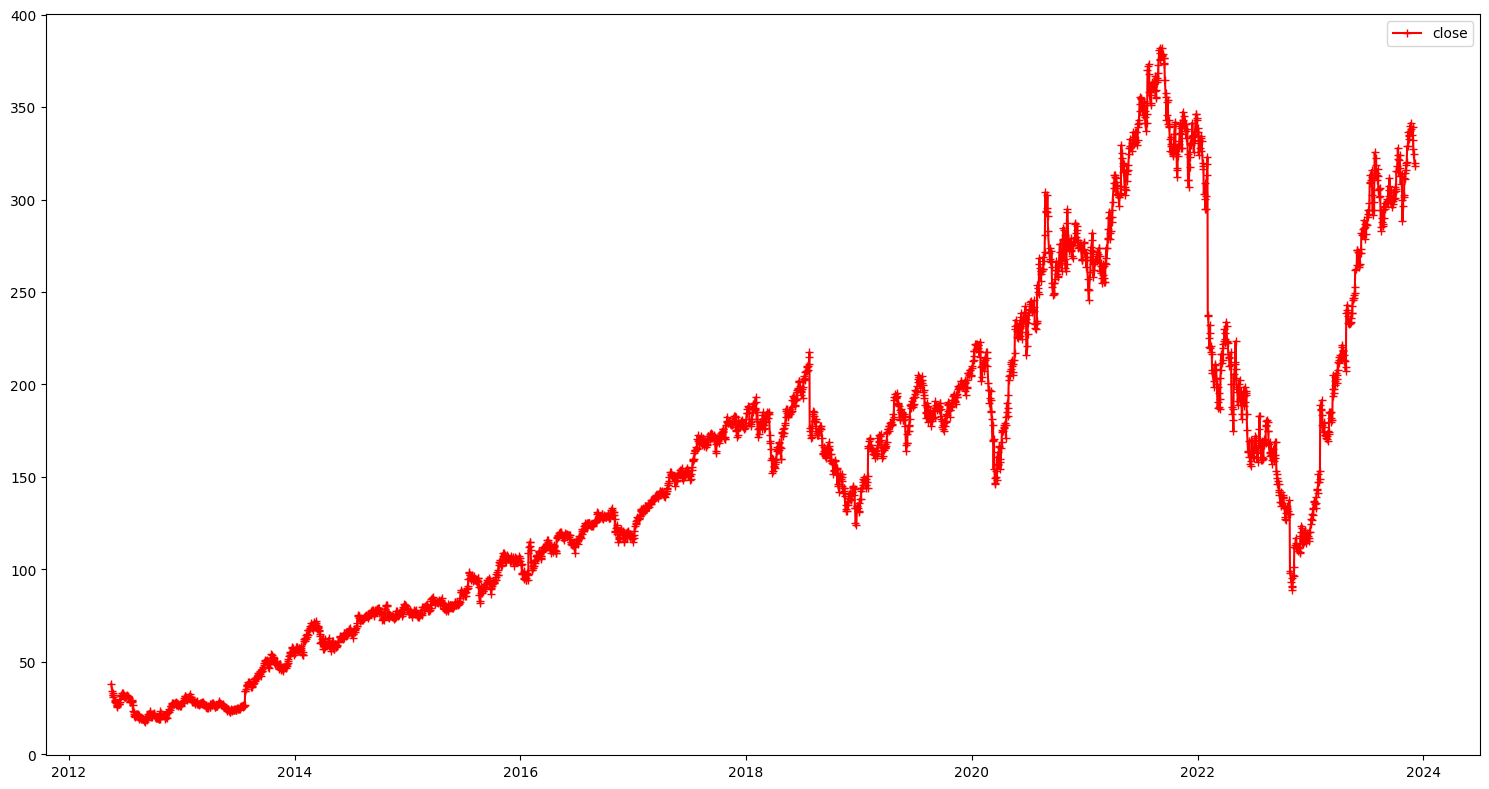

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(data['Date'], data['Close'], c="r", label="close", marker="+")
# plt.title(company)
plt.legend()
plt.tight_layout()

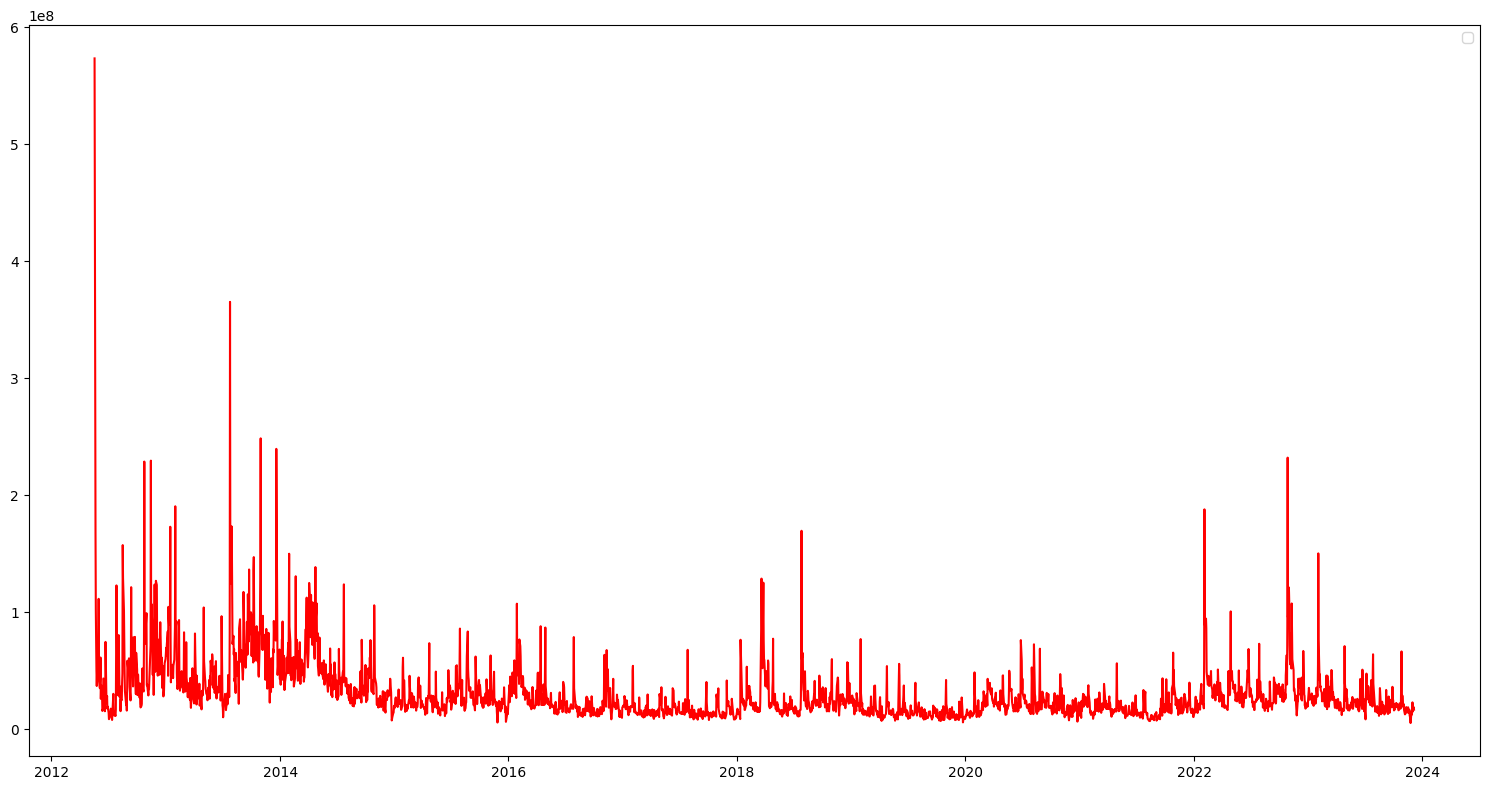

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(data['Date'], data['Volume'], c="r") # , c="r", label="close", marker="+"
# plt.title(company)
plt.legend()
plt.tight_layout()

In [19]:
close_data = data.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)


2761


In [20]:
close_data.head()

,Close
2905,38.2318
2904,34.0300
2903,31.0000
2902,32.0000
2901,33.0300


In [33]:
print(type(dataset))
print(f"Shape: {dataset.shape}")
dataset[:10]

<class 'numpy.ndarray'>
Shape: (2906, 1)


array([[38.2318],
       [34.03  ],
       [31.    ],
       [32.    ],
       [33.03  ],
       [31.91  ],
       [28.84  ],
       [28.19  ],
       [29.6   ],
       [27.72  ]])

In [32]:
for i in range(60, 70):
  print(i)

60
61
62
63
64
65
66
67
68
69


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')

x_train.shape: (2701, 60, 1)
y_train.shape: (2701,)


In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [25]:
x_train.shape

(2701, 60, 1)

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)


Epoch 1/10
85/85 [==============================] - 13s 9ms/step - loss: 0.0161
Epoch 2/10
85/85 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 3/10
85/85 [==============================] - 1s 8ms/step - loss: 0.0062
Epoch 4/10
85/85 [==============================] - 1s 8ms/step - loss: 0.0058
Epoch 5/10
85/85 [==============================] - 1s 8ms/step - loss: 0.0052
Epoch 6/10
85/85 [==============================] - 1s 8ms/step - loss: 0.0047
Epoch 7/10
85/85 [==============================] - 1s 8ms/step - loss: 0.0046
Epoch 8/10
85/85 [==============================] - 1s 7ms/step - loss: 0.0039
Epoch 9/10
85/85 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 10/10
85/85 [==============================] - 1s 11ms/step - loss: 0.0033


In [28]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


5/5 [==============================] - 1s 6ms/step
MSE 195.30301441778846
RMSE 13.975085488747053


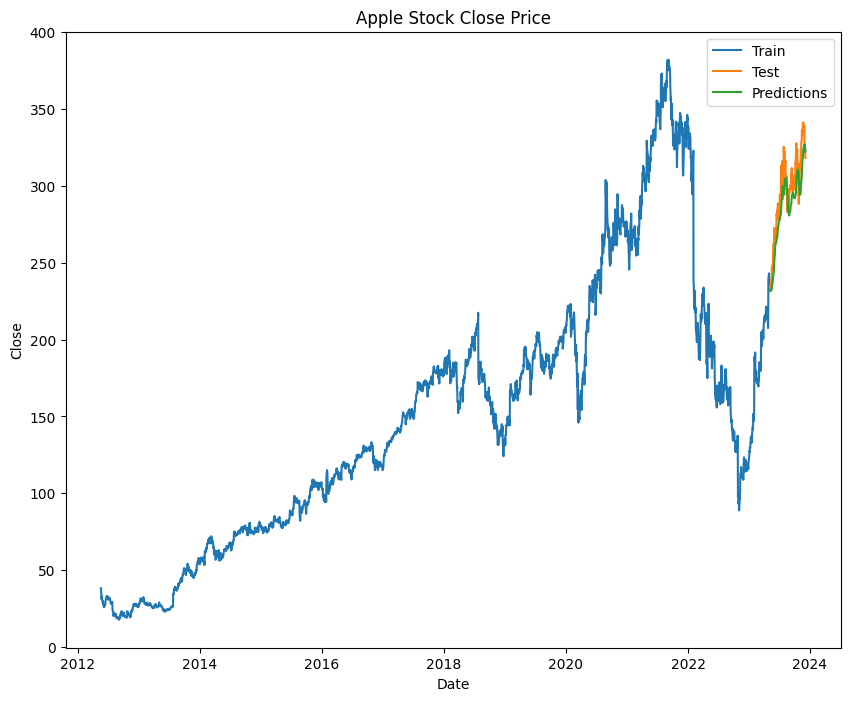

In [29]:
train = data[:training]
test = data[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
